### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量：一组测试数据的颜色和文字是否一致；因变量：参与者说出测试数据的颜色所需的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

原假设：参与者说出不一致文字条件下的墨色的时间小于等于一致文字条件下的时间:
$$\mu_x-\mu_y\le0 $$
备选假设：参与者说出不一致文字条件下的墨色的时间大于一致文字条件下的时间:
$$\mu_x-\mu_y>0 $$
$\mu_x$:不一致文字条件的测试样本中，参与者说出墨色名称所需时间的平均值；
$\mu_y$:一致文字条件的测试样本中，参与者说出墨色名称所需时间的平均值。
此处执行配对$t$检验。该实验中，总体呈正态分布，未知总体标准差，而且样本量小于30，所以需要使用t检验，通过样本数据检验是否可拒绝零假设。
这个实验下每名参与者都有两个情况（颜色与文字相同和不同）下的测试时间，这两个测试时间可能都受到这名参与者本身正常的反应时间影响，所以这两组样本属于相关样本。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [2]:
# 在这里执行你的分析
import pandas as pd
sp=pd.read_csv('stroopdata.csv')
sp.head()
sp['Congruent'].describe()
sp['Incongruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

一致文字条件下，参与者说出的平均时间14.05秒，标准差是3.559；不一致文字条件下，参与者说出的平均时间是22秒，标准差是4.797

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0,0.5,'population')

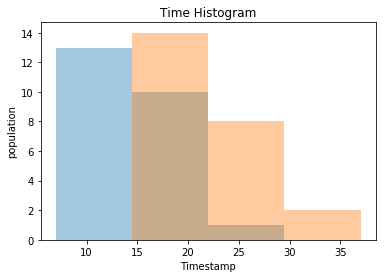

In [26]:
# 在这里创建可视化图表
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import numpy as np 
x=sp['Congruent']
y=sp['Incongruent']
fig = plt.figure()
bins=np.linspace(7, 37, 5)

plt.hist(x, bins, alpha=0.4)
plt.hist(y, bins, alpha=0.4)
plt.title("Time Histogram")
plt.xlabel("Timestamp")
plt.ylabel("population")

很明显，不一致文字条件下的测试人员，使用时间主要集中在更高的时间区间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [83]:
def cal_t(diff):
    #计算标准偏差
    import numpy as np
    diff_count=range(int(diff.count()))
    diff_mean=diff.mean()
    sum=0
    for i in range(24):
        sum=sum+(diff[i]-diff_mean)*(diff[i]-diff_mean)
    return np.sqrt(sum/(diff.count()-1))

In [87]:
# 在这里执行统计检验
import numpy as np
diff=sp['Incongruent']-sp['Congruent'] #不一致文字条件与一致文字条件的差值
diff_count=diff.count()
diff_mean=diff.mean()
t=diff_mean*np.sqrt(diff_count)/cal_t(diff)
t

8.0207069441099552

1、建立假设。原假设$ H_0:\mu_x-\mu_y\le0 $；备选假设$ H_1:\mu_x-\mu_y>0 $；
2、检验统计量：
$$ t = \frac{(\mu_x-\mu_y)-\mu_0}{\frac{s_d}{\sqrt{n}}}$$
3、确定临界值：当$\alpha=0.05$时，$$t_{1-0.05/2}(n_1+n_2-2)=1.714$$
4、判断检验统计量： $t=8.02>1.714$ 所以$t$落在拒绝域，我们拒绝$H_0$，也就是说不一致文字条件下，参与者说出文字颜色的时间大于一致文字条件下的时间 

（6）可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！

1、根据百科说明：当测试者被要求回答有颜色意义的字体的颜色时，回答字本身的意义为优势反应，而回答字体颜色为非优势反应，若字体颜色与自意不同，被测者往往会反应速度下降，出错率上升。
2、色不一致时可以观察到斯特鲁普效应，用数字作刺激也可以研究斯特鲁普效应。当数字的符号意义和数字串的长度不一致时，斯特鲁普效应也会被观察到。可以用一个简单的实验加以验证：
呈现给你的被试由重复1-9的多个数字构成的数，如" 123 "，被试的任务是尽快说出字符的个数，也就是说，在这个例子中要报告“3”，对你的被试回答数字数量的反应时间计时；然后在呈现某种字符，这串字符要和数字构成的字符串长度一样长，但是只包括一种非数字的符号，如" *** ",对你的被试回答符号数量的反应时间计时；最后，写出一列长度和前两列一样的字符串，其中只包括一种数字符号，如"555"，对你的被试回答数字数量的反应时间计时。
参考链接：https://baike.baidu.com/item/%E6%96%AF%E7%89%B9%E9%B2%81%E6%99%AE%E6%95%88%E5%BA%94/4903054#reference-[1]-991413-wrap